In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os  

In [2]:
files=os.listdir('C:\Covid-19')
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [3]:
def read_data (path,filename):
    return pd.read_csv(path+'/'+filename)
    

In [4]:
path='C:\Covid-19'
world_data=read_data(path,'worldometer_data.csv')


In [5]:
day_wise=read_data(path,files[2]) 

In [6]:
group_data=read_data(path,files[3]) 

In [7]:
usa_data=read_data(path,files[4]) 

In [8]:
province_data=read_data(path,files[1]) 

In [9]:
province_data.shape

(49068, 10)

In [10]:
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [11]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [12]:
import plotly.express as px

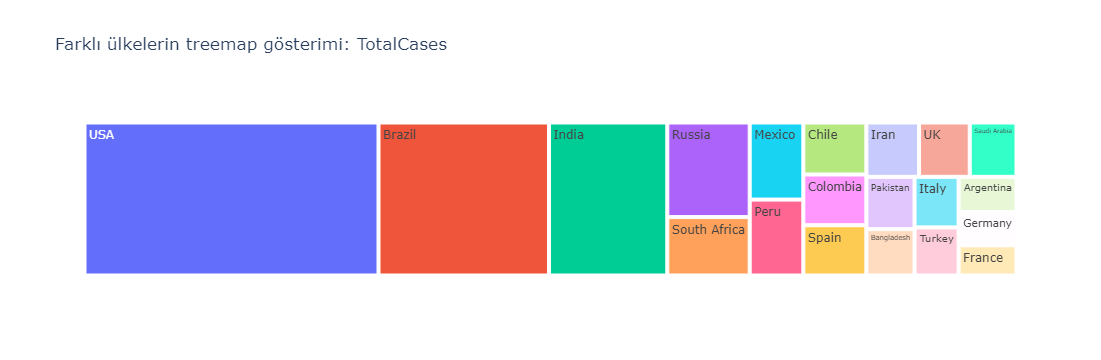

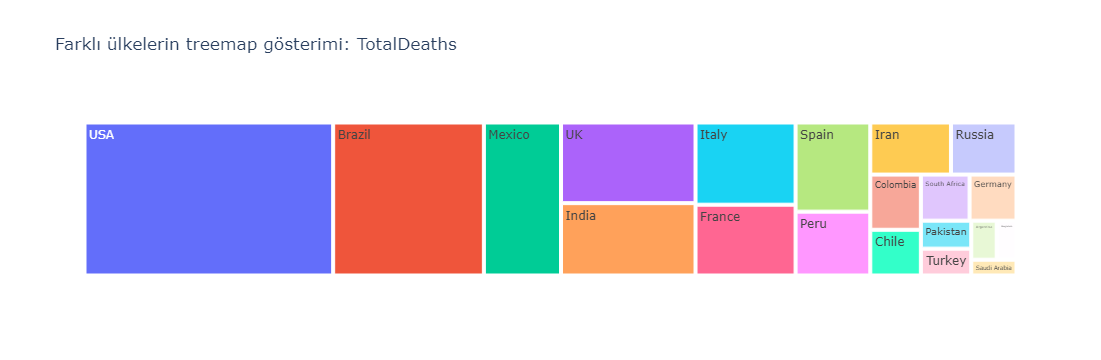

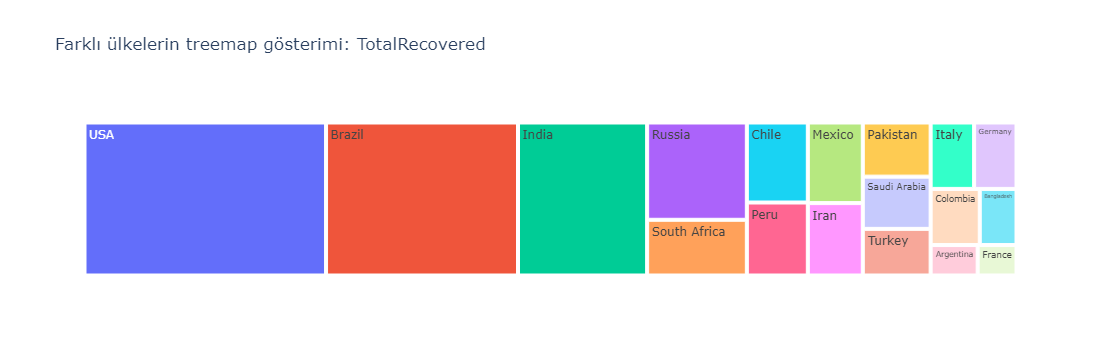

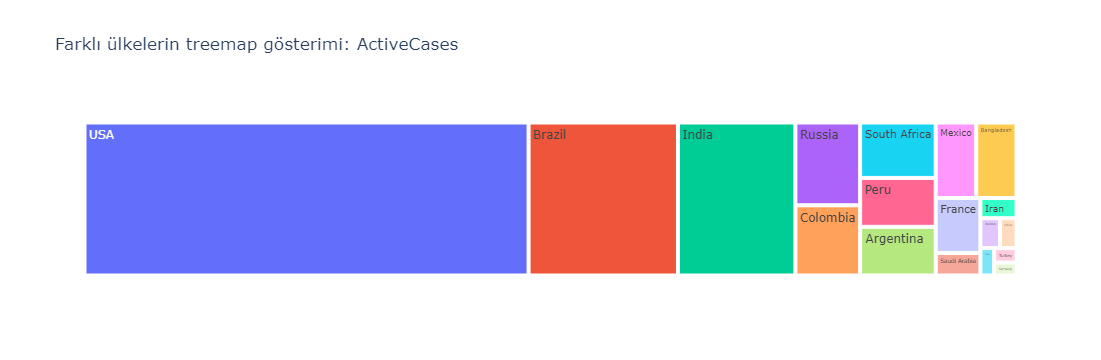

In [13]:
columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']

for i in columns:
    fig = px.treemap(world_data.iloc[0:20], values=i, path=[ 'Country/Region'], title='Farklı ülkelerin treemap gösterimi: {}'.format(i))
    fig.show()


In [14]:
day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [15]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

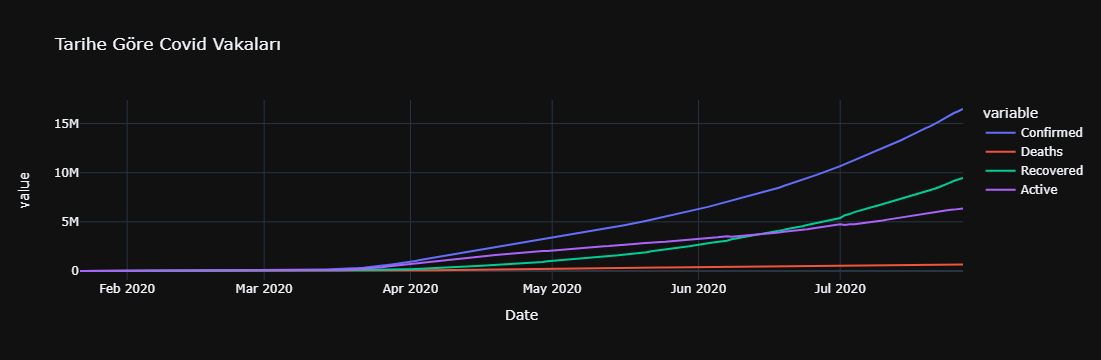

In [16]:
px.line(day_wise,x='Date' ,y=['Confirmed', 'Deaths', 'Recovered', 'Active'],title='Tarihe Göre Covid Vakaları',template='plotly_dark')

In [17]:
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [18]:
pop_test_ratio=world_data['Population']/world_data['TotalTests'].iloc[0:20]

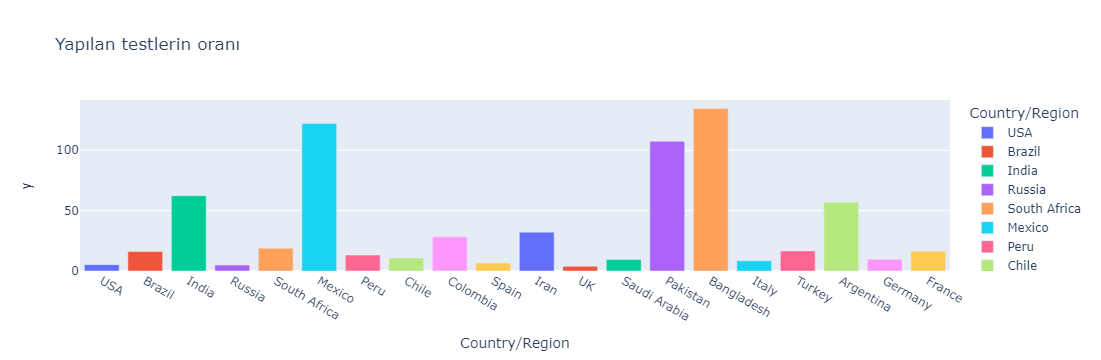

In [19]:
fig=px.bar(world_data.iloc[0:20],x='Country/Region',y=pop_test_ratio[0:20],color='Country/Region',title='Yapılan testlerin oranı')
fig.show()

In [20]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

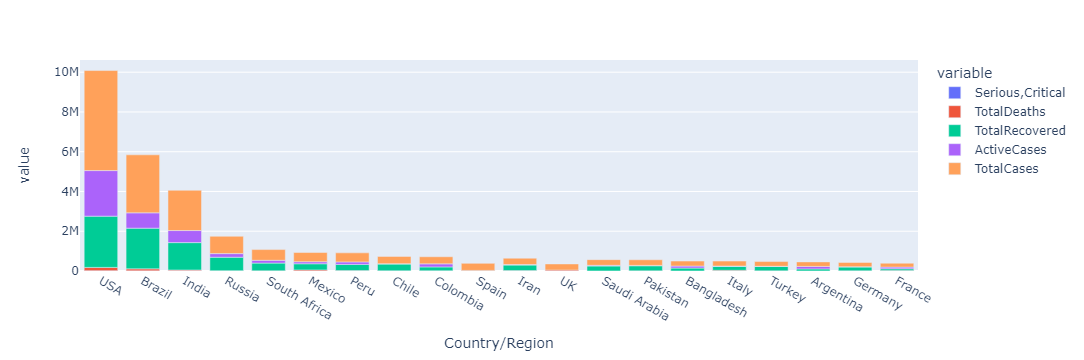

In [21]:
px.bar(world_data.iloc[0:20],x='Country/Region',y=['Serious,Critical', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'TotalCases']) 

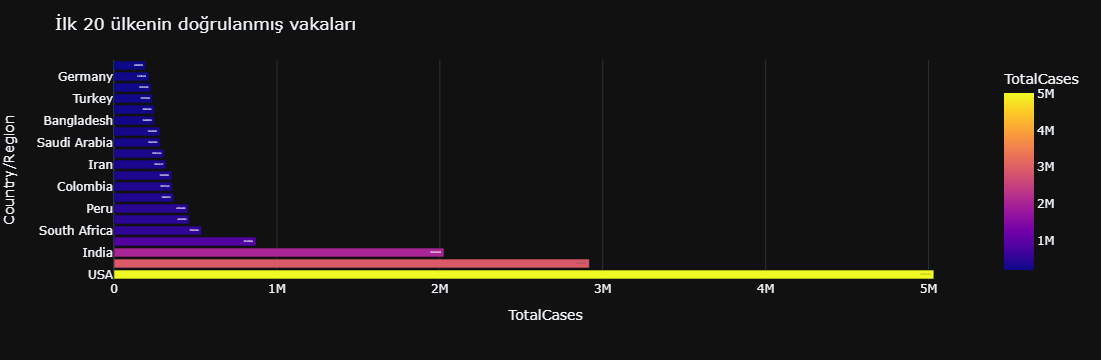

In [22]:
fig=px.bar(world_data.iloc[0:20],y='Country/Region',x='TotalCases',color='TotalCases',text='TotalCases')
fig.update_layout(template='plotly_dark',title_text='İlk 20 ülkenin doğrulanmış vakaları')
fig.show()

In [23]:
world_data.sort_values(by='TotalDeaths',ascending=False)

Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
5                   Mexico  North America  1.290662e+08      462690    6590.0   
11                      UK         Europe  6.792203e+07      308134       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
..                     ...            ...           ...         ...       ...   
202  Saint Kitts and Nevis  North America  5.323700e+04          17       NaN   
203              Greenland  North America  5.678000e+04          14       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   

     TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0       162804.0        NaN       2576668.0           NaN    2292707.0   
1        98644.0        NaN       2047660.0           NaN     771258.0   
5        50517.0      819.0        308848.0        4140.0     103325.0   
11       46413.0        NaN             NaN           NaN          NaN   
2        41638.0        NaN       1377384.0           NaN     606387.0   
..           ...        ...             ...           ...          ...   
202          NaN        NaN            16.0           NaN          1.0   
203          NaN        NaN            14.0           NaN          0.0   
205          NaN        NaN             7.0           NaN          6.0   
206          NaN        NaN            13.0           NaN          0.0   
207          NaN        NaN            12.0           NaN          0.0   

     Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0             18296.0           15194.0          492.0  63139605.0   
1              8318.0           13716.0          464.0  13206188.0   
5              3987.0            3585.0          391.0   1056915.0   
11               73.0            4537.0          683.0  17515234.0   
2              8944.0            1466.0           30.0  22149351.0   
..                ...               ...            ...         ...   
202               NaN             319.0            NaN      1146.0   
203               NaN             247.0            NaN      5977.0   
205               NaN             495.0            NaN       424.0   
206               NaN            3726.0            NaN      1816.0   
207               NaN           14981.0            NaN         NaN   

     Tests/1M pop      WHO Region  
0        190640.0        Americas  
1         62085.0        Americas  
5          8189.0        Americas  
11       257873.0          Europe  
2         16035.0  South-EastAsia  
..            ...             ...  
202       21526.0        Americas  
203      105266.0          Europe  
205       16154.0             NaN  
206      520493.0             NaN  
207           NaN          Europe  

[209 rows x 16 columns]

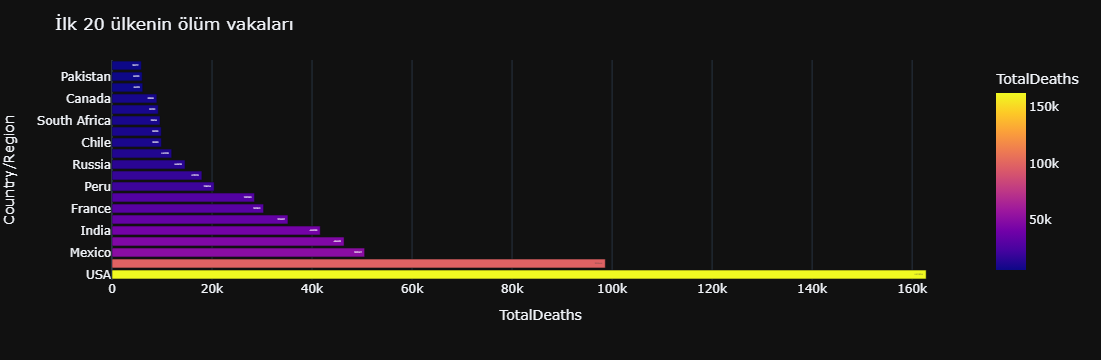

In [24]:
fig=px.bar(world_data.sort_values(by='TotalDeaths',ascending=False)[0:20],y='Country/Region',x='TotalDeaths',color='TotalDeaths',text='TotalDeaths')
fig.update_layout(template='plotly_dark',title_text='İlk 20 ülkenin ölüm vakaları')
fig.show()

In [25]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

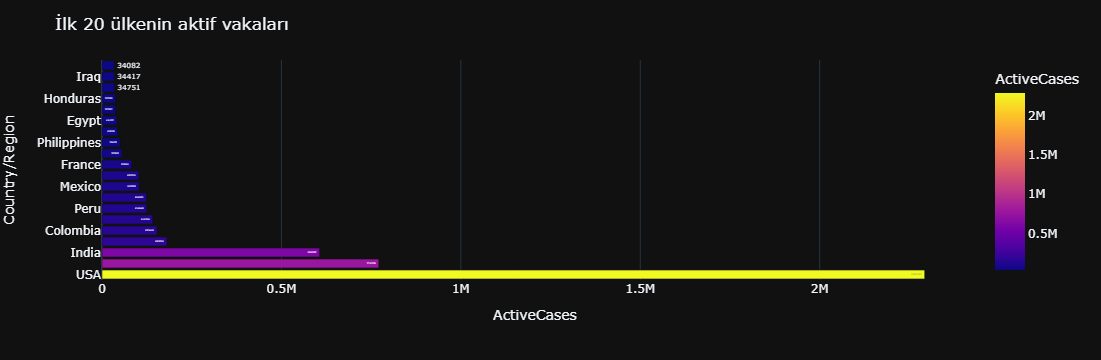

In [26]:
fig=px.bar(world_data.sort_values(by='ActiveCases',ascending=False)[0:20],y='Country/Region',x='ActiveCases',color='ActiveCases',text='ActiveCases')
fig.update_layout(template='plotly_dark',title_text='İlk 20 ülkenin aktif vakaları')
fig.show()

In [27]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

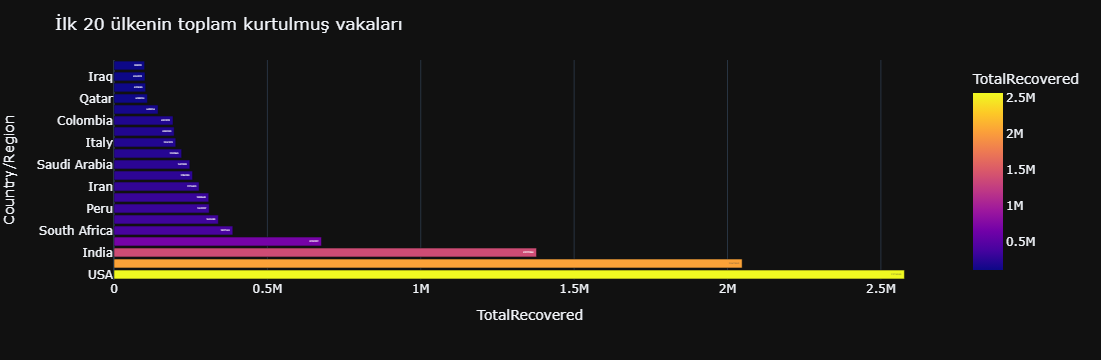

In [28]:
fig=px.bar(world_data.sort_values(by='TotalRecovered',ascending=False)[0:20],y='Country/Region',x='TotalRecovered',color='TotalRecovered',text='TotalRecovered')
fig.update_layout(template='plotly_dark',title_text='İlk 20 ülkenin toplam kurtulmuş vakaları')
fig.show()

In [29]:
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

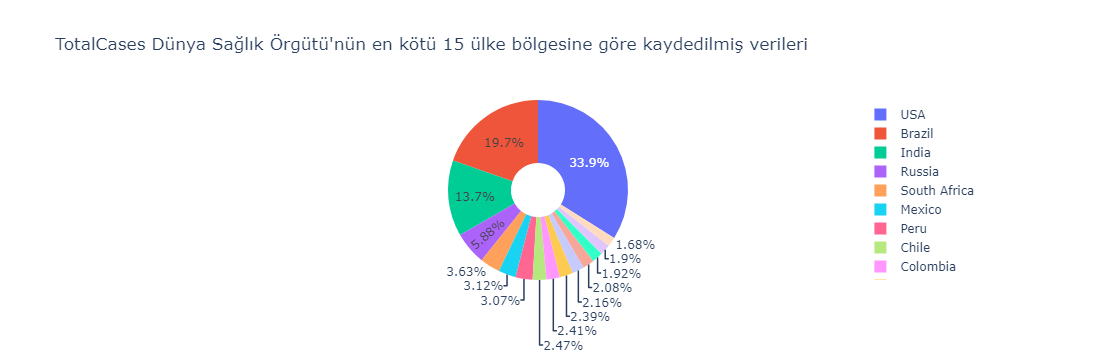

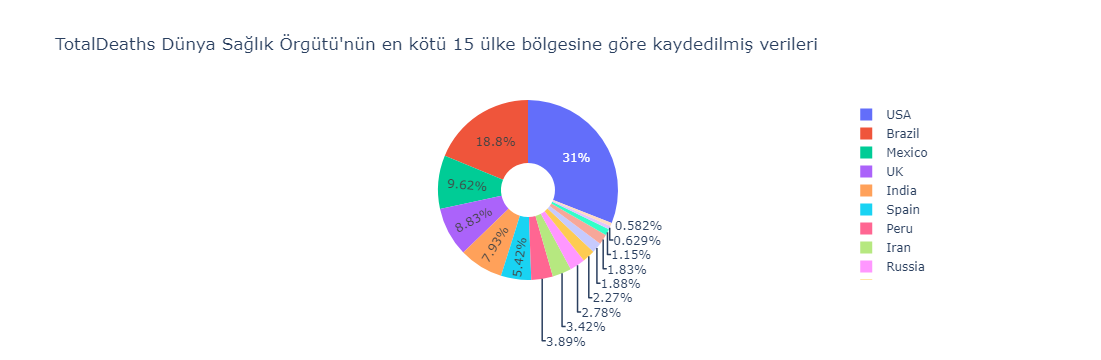

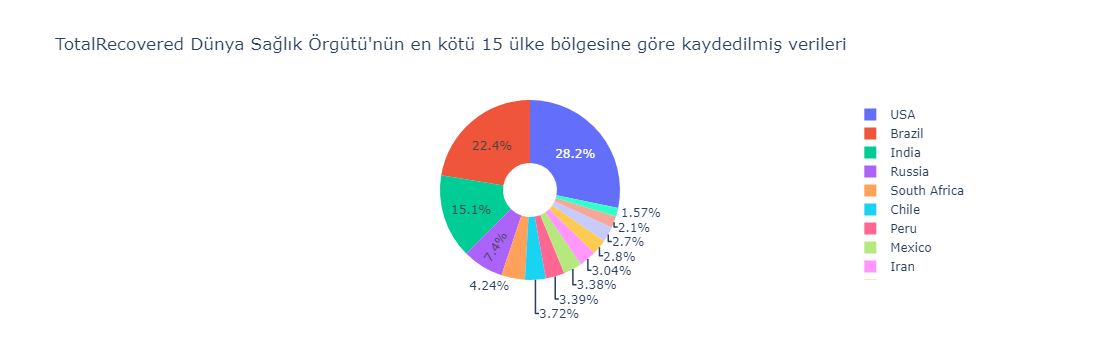

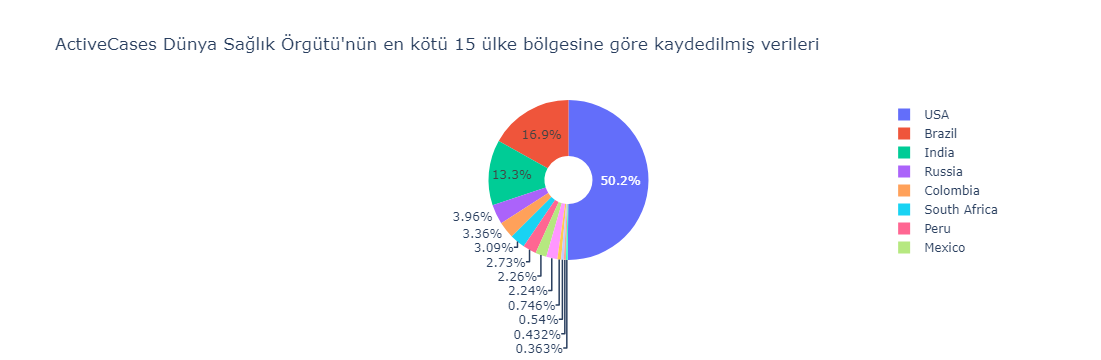

In [30]:
labels=world_data[0:15]['Country/Region'].values
cases=['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for i in cases:
    fig=px.pie(world_data[0:15],values=i,names=labels,hole=0.3,title=" {} Dünya Sağlık Örgütü'nün en kötü 15 ülke bölgesine göre kaydedilmiş verileri".format(i))
    fig.show()

In [31]:
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [32]:
deaths_to_confirmed=world_data['TotalDeaths']/world_data['TotalCases']
deaths_to_confirmed

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

In [33]:
deaths_to_recovered=world_data['TotalDeaths']/world_data['TotalRecovered']

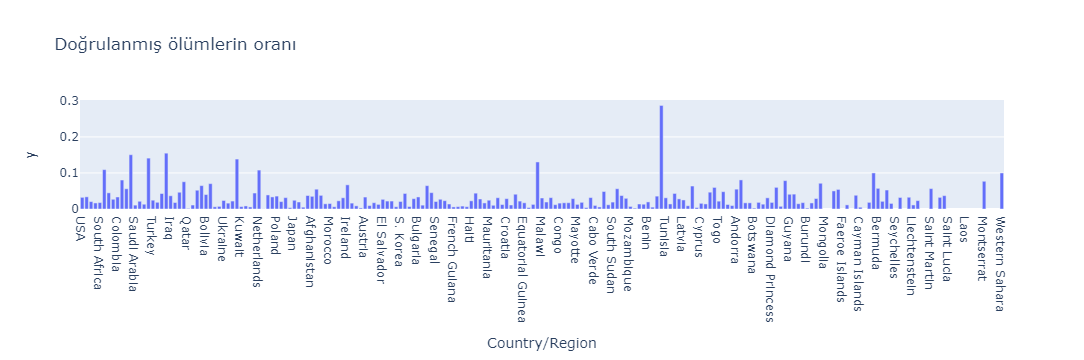

In [34]:
px.bar(world_data,x='Country/Region',y=deaths_to_confirmed,title='Doğrulanmış ölümlerin oranı')

In [35]:
world_data['Serious,Critical']/world_data['TotalDeaths']

0      0.112381
1      0.084323
2      0.214804
3      0.157470
4      0.056122
         ...   
204         NaN
205         NaN
206         NaN
207         NaN
208         NaN
Length: 209, dtype: float64

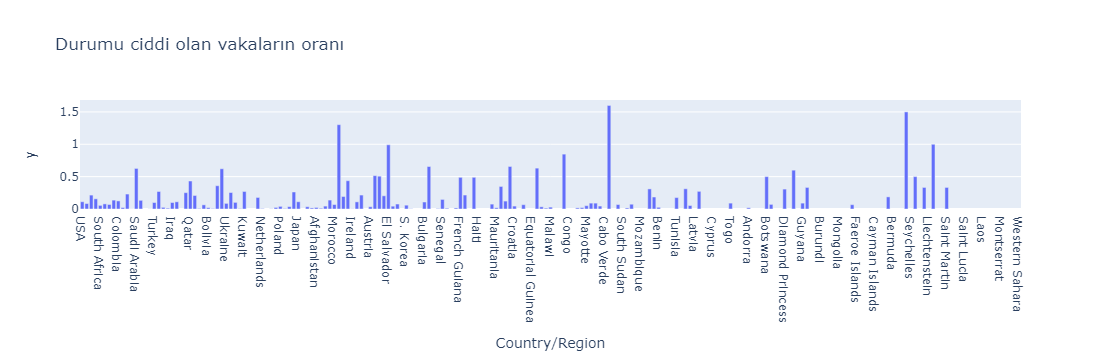

In [36]:
px.bar(world_data,x='Country/Region',y=world_data['Serious,Critical']/world_data['TotalDeaths'],title='Durumu ciddi olan vakaların oranı')

In [37]:
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [39]:
def country_visualisation(df,country):
    data = df[df['Country/Region']==country]

    data2=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]

    fig = make_subplots(rows=1, cols=4, subplot_titles=('Confirmed', 'Deaths', 'Recovered', 'Active'))

    fig.add_trace(
        go.Scatter(name='Confirmed', x=data2['Date'], y=data2['Confirmed']),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(name='Deaths', x=data2['Date'], y=data2['Deaths']),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(name='Recovered', x=data2['Date'], y=data2['Recovered']),
        row=1, col=3
    )

    fig.add_trace(
        go.Scatter(name='Active', x=data2['Date'], y=data2['Active']),
        row=1, col=4
    )

    fig.update_layout(height=600, width=1000, title_text='Date vs Recorded case of {}'.format(country), template="plotly_dark")
    fig.show()

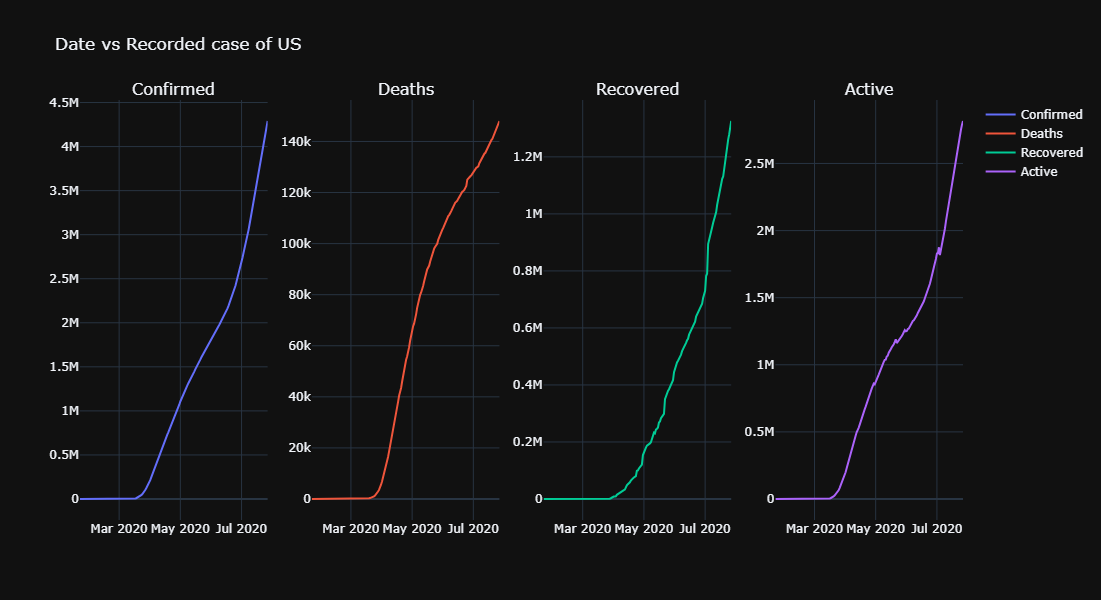

In [47]:
country_visualisation(group_data,'US')

In [45]:
group_data[0:20]

Date       Country/Region  Confirmed  Deaths  Recovered  Active  \
0   2020-01-22          Afghanistan          0       0          0       0   
1   2020-01-22              Albania          0       0          0       0   
2   2020-01-22              Algeria          0       0          0       0   
3   2020-01-22              Andorra          0       0          0       0   
4   2020-01-22               Angola          0       0          0       0   
5   2020-01-22  Antigua and Barbuda          0       0          0       0   
6   2020-01-22            Argentina          0       0          0       0   
7   2020-01-22              Armenia          0       0          0       0   
8   2020-01-22            Australia          0       0          0       0   
9   2020-01-22              Austria          0       0          0       0   
10  2020-01-22           Azerbaijan          0       0          0       0   
11  2020-01-22              Bahamas          0       0          0       0   
12  2020-01-22              Bahrain          0       0          0       0   
13  2020-01-22           Bangladesh          0       0          0       0   
14  2020-01-22             Barbados          0       0          0       0   
15  2020-01-22              Belarus          0       0          0       0   
16  2020-01-22              Belgium          0       0          0       0   
17  2020-01-22               Belize          0       0          0       0   
18  2020-01-22                Benin          0       0          0       0   
19  2020-01-22               Bhutan          0       0          0       0   

    New cases  New deaths  New recovered             WHO Region  
0           0           0              0  Eastern Mediterranean  
1           0           0              0                 Europe  
2           0           0              0                 Africa  
3           0           0              0                 Europe  
4           0           0              0                 Africa  
5           0           0              0               Americas  
6           0           0              0               Americas  
7           0           0              0                 Europe  
8           0           0              0        Western Pacific  
9           0           0              0                 Europe  
10          0           0              0                 Europe  
11          0           0              0               Americas  
12          0           0              0  Eastern Mediterranean  
13          0           0              0        South-East Asia  
14          0           0              0               Americas  
15          0           0              0                 Europe  
16          0           0              0                 Europe  
17          0           0              0               Americas  
18          0           0              0                 Africa  
19          0           0              0        South-East Asia